<a href="https://colab.research.google.com/github/HasiniSandunika/titanic-survival-classification/blob/master/titanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/titanic_ml/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/titanic_ml/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

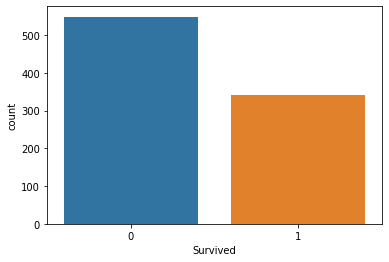

In [12]:
sns.countplot(data=train_data, x='Survived')

In [13]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

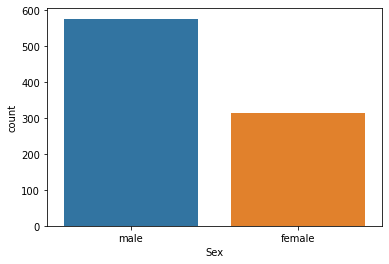

In [14]:
sns.countplot(data=train_data, x='Sex')

In [15]:
test_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

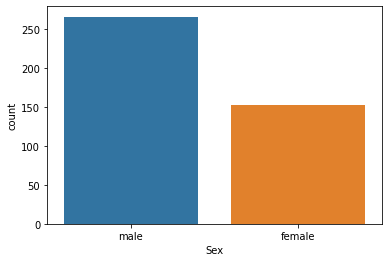

In [16]:
sns.countplot(data=test_data, x='Sex')

In [17]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
len(train_data['Cabin'].value_counts())

147

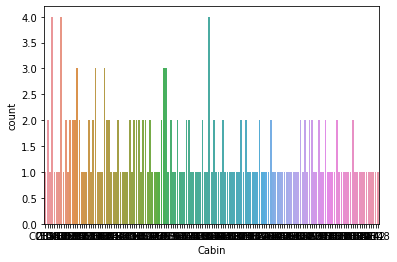

In [19]:
sns.countplot(data=train_data, x='Cabin')

In [20]:
test_data['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [21]:
len(test_data['Cabin'].value_counts())

76

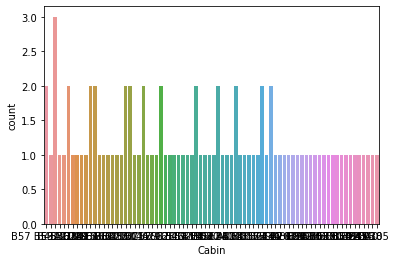

In [22]:
sns.countplot(data=test_data, x='Cabin')

In [23]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

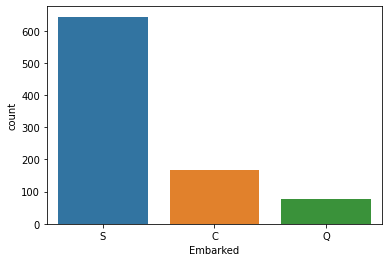

In [24]:
sns.countplot(data=train_data, x='Embarked')

In [25]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

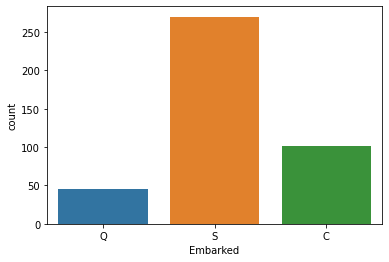

In [26]:
sns.countplot(data=test_data, x='Embarked')

In [27]:
train_data['Embarked'].mode()[0]

'S'

In [28]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test_data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

In [30]:
print(train_data.shape)
print(test_data.shape)
train_data.drop_duplicates()
test_data.drop_duplicates()
print('*****************************')
print(train_data.shape)
print(test_data.shape)

(891, 8)
(418, 8)
*****************************
(891, 8)
(418, 8)


In [31]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [32]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


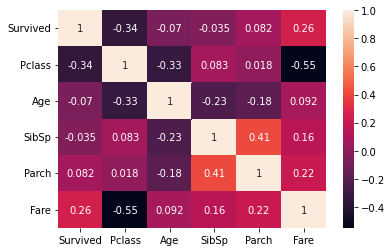

In [29]:
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [33]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
# train data
train_data.loc[train_data['Sex']=='male','Sex']=1
train_data.loc[train_data['Sex']=='female','Sex']=0
train_data.loc[train_data['Embarked']=='Q','Embarked']=0
train_data.loc[train_data['Embarked']=='S','Embarked']=1
train_data.loc[train_data['Embarked']=='C','Embarked']=2
# test data
test_data.loc[test_data['Sex']=='male','Sex']=1
test_data.loc[test_data['Sex']=='female','Sex']=0
test_data.loc[test_data['Embarked']=='Q','Embarked']=0
test_data.loc[test_data['Embarked']=='S','Embarked']=1
test_data.loc[test_data['Embarked']=='C','Embarked']=2

In [36]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,2
2,1,3,0,26.000000,0,0,7.9250,1
3,1,1,0,35.000000,1,0,53.1000,1
4,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1
887,1,1,0,19.000000,0,0,30.0000,1
888,0,3,0,29.699118,1,2,23.4500,1
889,1,1,1,26.000000,0,0,30.0000,2


In [37]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,0
1,893,3,0,47.00000,1,0,7.0000,1
2,894,2,1,62.00000,0,0,9.6875,0
3,895,3,1,27.00000,0,0,8.6625,1
4,896,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,1
414,1306,1,0,39.00000,0,0,108.9000,2
415,1307,3,1,38.50000,0,0,7.2500,1
416,1308,3,1,30.27259,0,0,8.0500,1


In [38]:
x=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [39]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1
1,1,0,38.000000,1,0,71.2833,2
2,3,0,26.000000,0,0,7.9250,1
3,1,0,35.000000,1,0,53.1000,1
4,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1
887,1,0,19.000000,0,0,30.0000,1
888,3,0,29.699118,1,2,23.4500,1
889,1,1,26.000000,0,0,30.0000,2


In [40]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [42]:
scaler= StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [43]:
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [44]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
round(model1.score(x_test, y_test)*100, 2)

78.89

In [46]:
y_pred1 = model1.predict(x_test)

In [47]:
conf_matrix1 = confusion_matrix(y_test,y_pred1, normalize='true')
conf_matrix1

array([[0.88235294, 0.11764706],
       [0.33333333, 0.66666667]])

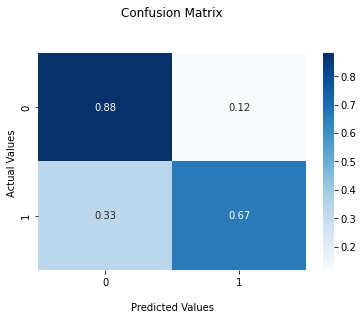

In [48]:
ax = sns.heatmap(conf_matrix1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [49]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.81      0.67      0.73        39

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.79      0.79      0.79        90



In [50]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
round(model2.score(x_test, y_test)*100, 2)

81.11

In [52]:
y_pred2 = model2.predict(x_test)

In [53]:
conf_matrix2 = confusion_matrix(y_test,y_pred2, normalize='true')
conf_matrix2

array([[0.92156863, 0.07843137],
       [0.33333333, 0.66666667]])

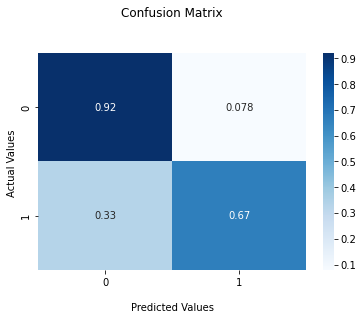

In [54]:
ax = sns.heatmap(conf_matrix2, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        51
           1       0.87      0.67      0.75        39

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.81      0.81        90



In [56]:
test_data1 = test_data.copy()
test_data1.drop(['PassengerId'], axis=1, inplace=True)
test_data1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,0
1,3,0,47.00000,1,0,7.0000,1
2,2,1,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,1
4,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1
414,1,0,39.00000,0,0,108.9000,2
415,3,1,38.50000,0,0,7.2500,1
416,3,1,30.27259,0,0,8.0500,1


In [57]:
sc = StandardScaler()
test_data1 = sc.fit_transform(test_data1)

In [58]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': model2.predict(test_data1)})
submission.to_csv('gender_submission.csv', index=False)
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
